# Dimension Reduction III: Singular Value Decomposition (SVD)
### Implemented in Python

<i>Patrick White</i></br>
<i>Jan 06, 2025</i>

<img src="img/dr3.png" style="height: 450px; width:auto;">

# Outline

- What is Principal Component Analysis (PCA)?
- Numpy Implementation
- Scikit-Learn Implementation
    - Reconstruction of Data
    - The Iris Dataset
- The Olivietti Faces Dataset
- Advantages and Limitations
- Scikit-Learn Implementation Details
    - Parameters
    - Atributes
    - Methods
- What’s Next?

# Theoretical Foundation

---
<i>Perhaps the most known and widely used matrix decomposition is SVD. All matrices have an SVD, which makes it more table than other methods, such as eigendecomposition"... SVD allows us to discover some of the same kind of information as the eigendecomposition. However, the SVD is more generally applicable."</i>
- Deep Learning (2016)
---

SVD is closely related to eigendecomposition, as eigendecomposition is a special case of SVD in which the matrix to be decomposed is square-symmetric. SVD can be thought of as an extension of eigendecomposition to non-square matrices, and thus, SVD and eigendecomposition are both valid methods for PCA, with the same result.

SVD decomposes one matrix into three matrices such that the product of these three matrices equals the original data $\mathbf{X}$.

<h4>$\mathbf{A} = \mathbf{U \Sigma V}^T$</h4>

- $\mathbf{A}$ is the $M \times N$ matrix to be decomposed. It can be square or rectangular, and any rank.

- $\mathbf{U}$ is the left singular vectors matrix ($M \times M$), provides an orthonormal basis for $\mathbb{R}^M$, including the column space of $\mathbf{A}$ and its complementary left-null space.

- $\mathbf{\Sigma}$ is the singular values matrix ($M \times N$), which is diagonal and contains the singular values $\sigma_i$, which are non-negative and real-valued.

- $\mathbf{V}^T$ refers to an orthogonal basis for the row space of $\mathbf{X}$.

The size of $\mathbf{U}$ corresponds to the number of rows in $\mathbf{A}$, the size of $\mathbf{V}$ corresponds to the number of columns in $\mathbf{A}$, and the size of $\mathbf{\Sigma}$ is the same as that of $\mathbf{A}$. These sizes allow $\mathbf{U}$ to be an orthonormal basis for $\mathbb{R}^M$ and for $\mathbf{V}$ to be an orthonormal basis for $\mathbb{R}^N$.

The eigenvalues of the covariance matrix $\mathbf{C}$ are the squared singular values of $\mathbf{X}$, and the eigenvectors of $\mathbf{C}$ are the left singular values of $\mathbf{X}$.

# Computing The SVD

Eigendecomposition is not defined for a non-square matrix $\mathbf{A}$, however $\mathbf{A}^T \mathbf{A}$ is eigendecomposable. Replacing $\mathbf{A}^T \mathbf{A}$ with its SVD matrices gives us:

- $\mathbf{A}^T \mathbf{A} = ( \mathbf{U \Sigma V}^T )^T ( \mathbf{U \Sigma V}^T )$

- $\mathbf{A}^T \mathbf{A} = \mathbf{V \Sigma}^T \mathbf{U}^T \mathbf{U \Sigma V}^T$

- $\mathbf{A}^T \mathbf{A} = \mathbf{V \Sigma}^2 \mathbf{V}^T$

$\mathbf{V}$ are the eigenvectors of $\mathbf{A}^T \mathbf{A}$ and $\mathbf{\Sigma}$ are the squared eigenvalues of $\mathbf{A}^T \mathbf{A}$. Because $\mathbf{\Sigma}$ is a diagonal matrix, $\Sigma^2$ simplifies to the diagonal elements (eigenvalues) squared of $\mathbf{\Sigma}$.

<p>Whereas we took the eigendecomposition of $\mathbf{A}^T \mathbf{A}$ to get $\mathbf{\Sigma}$ and $\mathbf{V}$, we compute the eigendecomposition of $\mathbf{AA}^T$ to obtain $\mathbf{U}$.

- $\mathbf{AA}^T = (\mathbf{U \Sigma V}^T) (\mathbf{U \Sigma V}^T)^T$
    
- $\mathbf{AA}^T = \mathbf{U \Sigma V}^T \mathbf{V \Sigma}^T \mathbf{U}^T$
    
- $\mathbf{AA}^T = \mathbf{U \Sigma}^2 \mathbf{U}^T$

It is not actually necessary to compute both steps to obtain the SVD. After applying either, you can compute the third matrix directly.

- $\mathbf{A V \Sigma}^{-1} = \mathbf{U}$
    
- $\mathbf{\Sigma}^{-1} \mathbf{U}^T \mathbf{A} = \mathbf{V}^T$

The goal of SVD is to have an exact decomposition of the matrix, and if the singular vectors are not properly normalized, then $\mathbf{A} \neq \mathbf{U \Sigma V}^T$

# Relationship to Eigendecomposition

There is a relationship between eigendecomposition/PCA and SVD with regard to symmetric square matrices. The eigenvalues of $A^TA$ equal the squared singular values of SVD($A$). For example:

In [2]:
import numpy as np

A = np.array([ [3,1,0], [1,1,0] ])

print( np.sort(np.linalg.eig(A.T@A)[0]) )
print( np.sort(np.linalg.svd(A)[1])**2 )

[ 0.          0.34314575 11.65685425]
[ 0.34314575 11.65685425]


This means that the eigenvalues of $A^TA$ are also equal to the non-squared singular values of SVD($A^TA$).

In [4]:
print( np.sort(np.linalg.eig(A.T@A)[0]) )
print( np.sort(np.linalg.svd(A.T@A)[1]) )

[ 0.          0.34314575 11.65685425]
[ 0.          0.34314575 11.65685425]


However, there is no relationship between the eigenvalues and singular values of a non-symmetric square matrix. In fact, while eigenvalues can commonly be complex-numbered, SVD produces on real singular values.

In [5]:
# eig(A) vs. svd(A)

A = [ [3,1,0], [1,1,0], [1,1,1] ]

print( np.sort(np.linalg.eig(A)[0]) )
print( np.sort(np.linalg.svd(A)[1]) )

[0.58578644 1.         3.41421356]
[0.49384652 1.10038368 3.68039011]


In [6]:
# eig(A) vs. svd(A), complex eigenvalues

A = np.random.randn(3,3)

print( np.sort(np.linalg.eig(A)[0]) )
print( np.sort(np.linalg.svd(A)[1]) )

[-0.39821964-0.77028014j -0.39821964+0.77028014j  0.73765293+0.j        ]
[0.23630267 0.70533964 3.32775422]


# Scikit-Learn PCA vs. TruncatedSVD

I'll compare the sklearn implementations PCA and TruncatedSVD (the main class of SVD). Both classes have a <code>components_</code> property and <code>singular_values_</code> property, and PCA($\mathbf{A}$) should give us the same results as SVD($\mathbf{A}$), as long as we mean-center the matrix before performing SVD. I'll start by creating a matrix, and then fitting both PCA and SVD to the data.

In [7]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# create the matrix
A = np.array([ [3,1,0], [1,1,0], [2,4,3] ])

# perform PCA
pca = PCA()
pca = pca.fit(A)

# perform SVD
mu = np.mean(A, axis=0)
X = A - mu
svd = TruncatedSVD(n_components=3)
svd = svd.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Then, I'll print out the components matrix to compare the results of the two methods. Aside from inconsequential sign differences, the results are the same.

In [8]:
# PCA
np.round(pca.components_,4)

array([[-0.    ,  0.7071,  0.7071],
       [ 1.    ,  0.    ,  0.    ],
       [-0.    ,  0.7071, -0.7071]])

In [9]:
# SVD
np.round(svd.components_,4)

array([[-0.    ,  0.7071,  0.7071],
       [ 1.    ,  0.    ,  0.    ],
       [-0.    ,  0.7071, -0.7071]])

Then, the singular values attribute.

In [10]:
# PCA
np.round(pca.singular_values_,5)

array([3.4641 , 1.41421, 0.     ])

In [11]:
# SVD
np.round(svd.singular_values_,5)

array([3.4641 , 1.41421, 0.     ])

Numpy also has an SVD implementation, which as you will see below, produces the same results as above.

In [12]:
svd = np.linalg.svd(X)
print('singular values:', np.round(svd[1],4))
print('components:')
print(np.round(svd[2],4))

singular values: [3.4641 1.4142 0.    ]
components:
[[-0.      0.7071  0.7071]
 [-1.     -0.     -0.    ]
 [ 0.     -0.7071  0.7071]]


Matrix inversion is not defined for matrices that are not square, however the psuedoinverse, denoted by $\mathbf{A^+}$, is. It can be calculated using the SVD of $\mathbf{A}$.

$\mathbf{A^+} = \mathbf{V D^+ U}^T$

The $\mathbf{D}^+$ can be calculated by creating a diagonal matrix from $\mathbf{\Sigma}$, calculating the reciprocal of each non-zero element in $\mathbf{\Sigma}$, and taking the transpose if the original matrix was rectangular.

$\Sigma = \begin{bmatrix} s_{1,1} & 0 & 0 \\ 0 & s_{2,2} & 0 \\ 0 & 0 & s_{3,3} \\ \end{bmatrix}$

$D^+ = \begin{bmatrix} \frac{1}{s_{1,1}} & 0 & 0 \\ 0 & \frac{1}{s_{2,2}} & 0 \\ 0 & 0 & \frac{1}{s_{3,3}} \\ \end{bmatrix}$

Below, I demonstrate that the numpy.linalg.pinv operation can be equivalently performed using SVD.

Using the pseudoinverse:

[[-10.   -5.    0.    5. ]
 [  8.5   4.5   0.5  -3.5]]


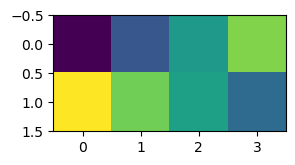

In [13]:
import matplotlib.pyplot as plt

# create the matrix
A = np.array([ [0.1, 0.2],
               [0.3, 0.4],
               [0.5, 0.6],
               [0.7, 0.8]])

# calc and visualize the pseudoinverse using pinv
B = np.linalg.pinv(A)
print(np.round(B,4))
plt.figure(figsize=(3,3))
plt.imshow(B);

Using SVD:

[[-10.   -5.    0.    5. ]
 [  8.5   4.5   0.5  -3.5]]


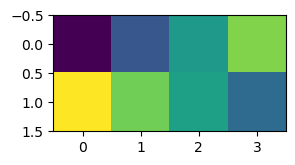

In [14]:
# factorize
U, s, VT = np.linalg.svd(A)

# reciprocals of s
d = 1.0 / s

# create D
D = np.zeros(A.shape)

# populate D with n x n diagonal matrix
D[:A.shape[1], :A.shape[1]] = np.diag(d)

# calc and visualize pseudoinverse
B = VT.T @ D.T @ U.T
print(np.round(B,4))
plt.figure(figsize=(3,3))
plt.imshow(B);

The first 20 components explain the vast majority of the variance. I'll reconstruct the images using only those components and print those dimension-reduced results.

# Low-Rank Approximation

Similar to PCA, we can use SVD to reduce the dimensionality of data such as images. Below is a comparison to PCA using the Olivetti faces dataset, and retaining the top 20 components in terms of their singular value.

In [15]:
#import data
from sklearn.datasets import fetch_olivetti_faces
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)
n_samples, n_features = faces.shape

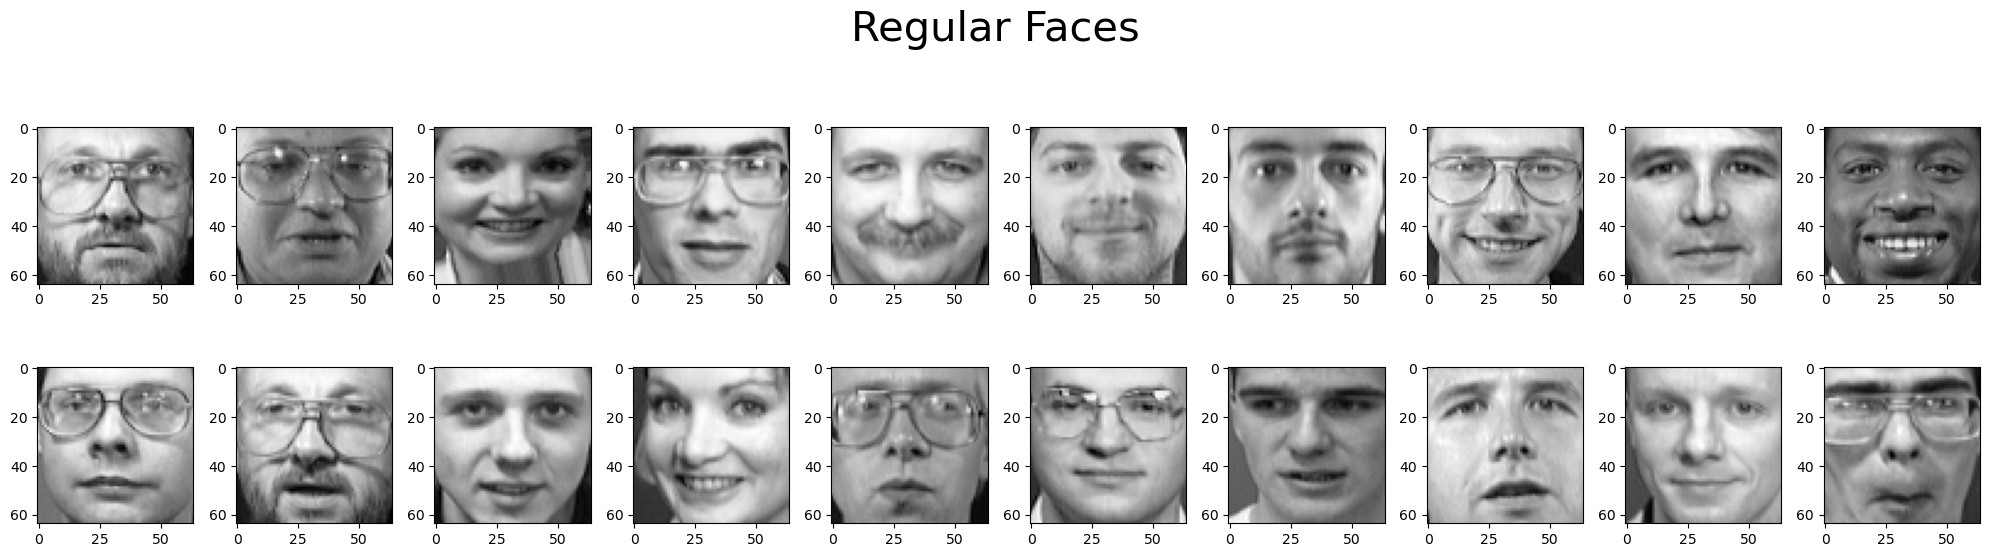

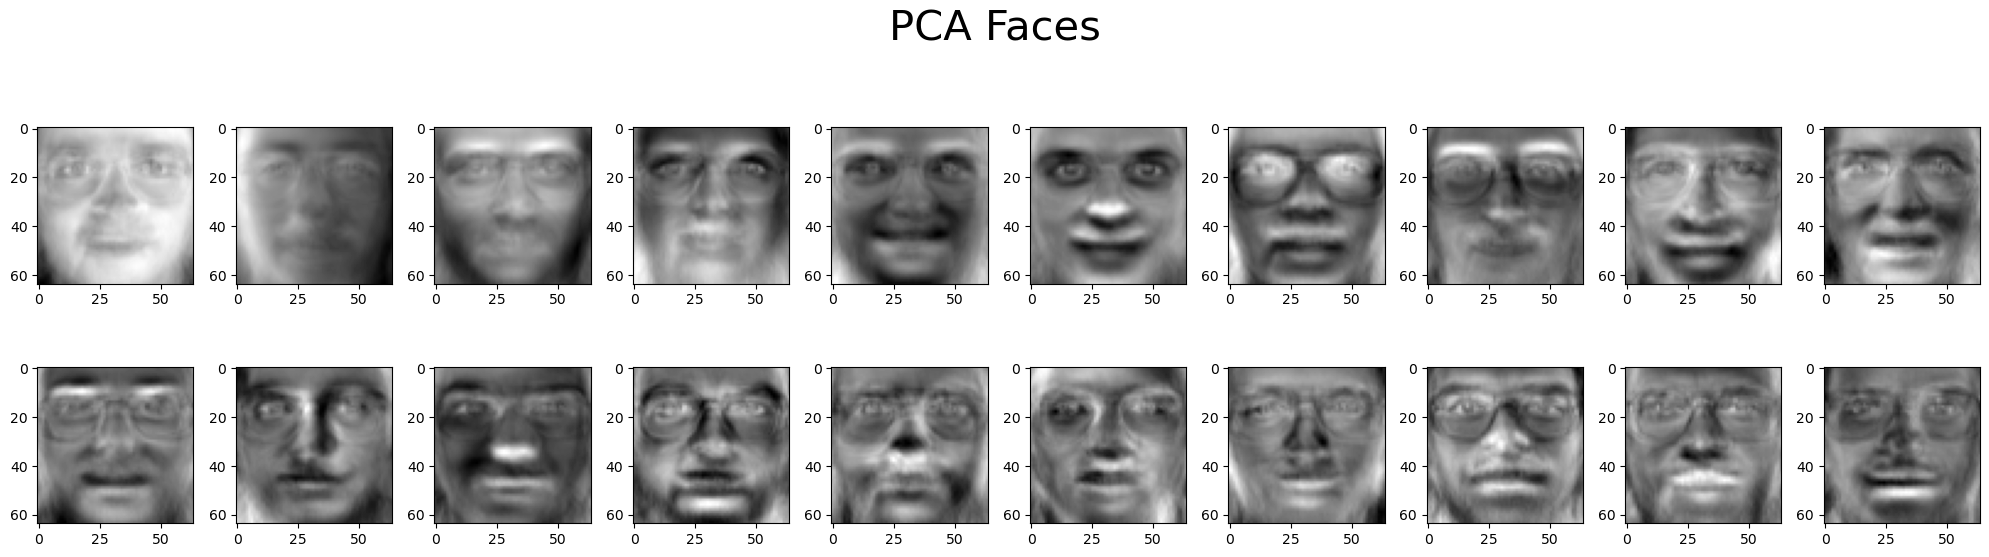

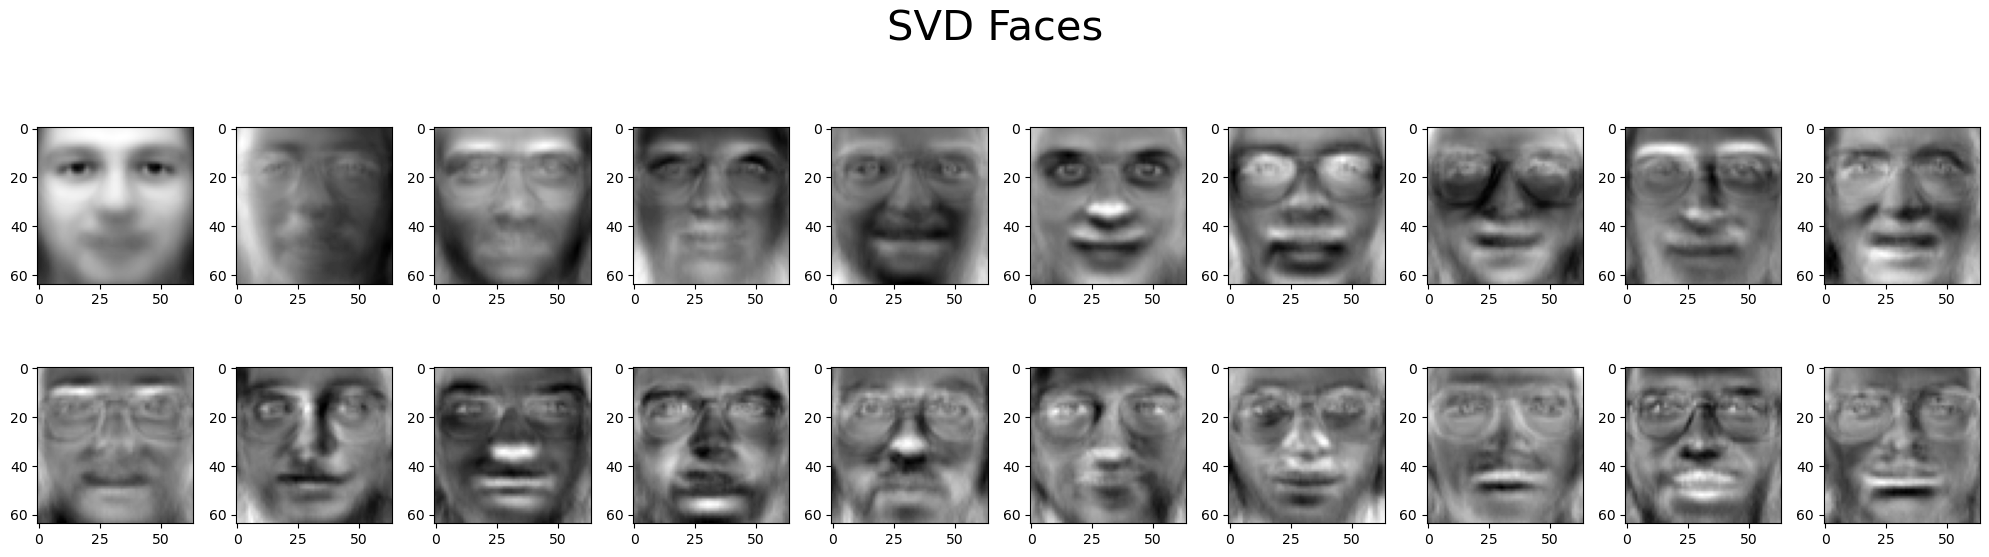

In [16]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Faces Regular
fig, axes = plt.subplots(2, 10, figsize=(20, 6))
nrows, ncols = int(np.sqrt(n_features)), int(np.sqrt(n_features))
for i in range(20):
    axes[i//10, i %10].imshow(np.reshape(faces[i], (nrows,ncols)), cmap='gray');
fig.suptitle('Regular Faces', fontsize=30)    
plt.tight_layout()

n_comp = 20


# PCA
pca = PCA(n_components=n_comp)
pca = pca.fit(faces)
comps = pca.components_[:n_comp]

fig, axes = plt.subplots(2, 10, figsize=(20, 6))
nrows, ncols = int(np.sqrt(n_features)), int(np.sqrt(n_features))
for i in range(20):
    axes[i//10, i %10].imshow(np.reshape(comps[i], (nrows,ncols)), cmap='gray');
fig.suptitle('PCA Faces', fontsize=30)
plt.tight_layout()


# SVD
svd = TruncatedSVD(n_components=n_comp)
svd = svd.fit(faces)
comps = svd.components_[:n_comp]

fig, axes = plt.subplots(2, 10, figsize=(20, 6))
nrows, ncols = int(np.sqrt(n_features)), int(np.sqrt(n_features))
for i in range(20):
    axes[i//10, i %10].imshow(np.reshape(comps[i], (nrows,ncols)), cmap='gray');
fig.suptitle('SVD Faces', fontsize=30) 
plt.tight_layout()

# Advantages and Limitations

Since SVD and PCA are closely related, they share similar advantages and limitations (noted in the previous article on PCA). However, SVD handles non-square matrices, and is more computationally intensive, given that it factorizes the entire data matrix instead of the covariance matrix of the data.

# Scikit-Learn Implementation Details

<code>sklearn.decomposition.TruncatedSVD(n_components=2, *, algorithm='randomized', n_iter=5, n_oversamples=10, power_iteration_normalizer='auto', random_state=None, tol=0.0)</code>

## Parameters

- <code>n_components</code> (default=all): desired dimensionality of the output data
- <code>n_iter</code> (default=5): number of iterations for randomized SVD solver.

## Attributes

- <code>components_</code>: the right singular vectors of the input data.
- <code>explained_variance_ratio_</code>: percent of variance explained by each of the selected components.
- <code>singular_values_</code>: .the singular values corresponding to each of the selected components.

## Methods

- <code>fit</code>: fit an instance of the model to the data
- <code>fit_transform</code>: fit an instance of the model to the data, and apply the dimensionality reduction to the data.
- <code>inverse_transform</code>: transform the data back to its original space.

# What’s Next?

We’ve now covered PCA and SVD, as well as the prerequisite concept of eigendecomposition. The next article will focus on linear discriminant analysis (LDA), a supervised learning method which is similar to PCA in its approach to dimension reduction, but also targets a particular feature for classification.

# References

- Cohen, M. X. (2021). Linear Algebra (1st ed.). SincXpress. 
https://sincxpress.com/books.html

- Brownlee, J. (2019). Basics of Linear Algebra for Machine Learning (2nd ed.). Machine Learning Mastery. 
https://machinelearningmastery.com/linear_algebra_for_machine_learning/

- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press. 
https://www.deeplearningbook.org/

- Cohen, M. X. (2024, May 1). Complete linear algebra: Theory and implementation in code [Online Course]. Udemy. 
https://www.udemy.com/course/linear-algebra-theory-and-implementation/

- Cohen, M. X. (2024, May 1). PCA & multivariate signal processing, applied to neural data [Online Course]. Udemy. 
https://www.udemy.com/course/dimension-reduction-and-source-separation-in-neuroscience/

- (n.d.). TruncatedSVD. Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

- Koren, Y., Bell, R., & Volinsky, C. (2009). Matrix Factorization Techniques for Recommender Systems. https://datajobs.com/data-science-repo/Recommender-Systems-%5BNetflix%5D.pdf